# Import statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Get data

## load datasets
- download from https://www.kaggle.com/meetnagadia/share-price-of-top-electric-car-company

In [2]:
def loadData(x):
    path = './data/' + x + '.csv'
    x = pd.read_csv(path).set_index('Date')
    return x

In [3]:
Volkswagen = loadData('Volkswagen').iloc[:, :-2]
bmw = loadData('bmw').iloc[:, :-2]
tesla = loadData('tesla').iloc[:, :-2]
nissan = loadData('nissan').iloc[:, :-2]
honda = loadData('honda').iloc[:, :-2]

## SP500和CSI300
方法参见：https://zhuanlan.zhihu.com/p/146726815

In [12]:
import pandas_datareader.data as pdr
sp500 = pdr.DataReader(name='^GSPC',
                       data_source='yahoo',
                       start='2016-08-24',
                       end='2021-08-23')
sp500.to_csv('./data/sp500.csv')

In [4]:
sp500 = loadData('sp500').iloc[:, :-2]
sp500

,High,Low,Open,Close
Date,,,,
2016-08-23,2193.419922,2186.800049,2187.810059,2186.899902
2016-08-24,2186.659912,2171.250000,2185.090088,2175.439941
2016-08-25,2179.000000,2169.739990,2173.290039,2172.469971
2016-08-26,2187.939941,2160.389893,2175.100098,2169.040039
2016-08-29,2183.479980,2170.189941,2170.189941,2180.379883
...,...,...,...,...
2021-08-17,4462.120117,4417.830078,4462.120117,4448.080078
2021-08-18,4454.319824,4397.589844,4440.939941,4400.270020
2021-08-19,4418.609863,4367.729980,4382.439941,4405.799805


In [84]:
import tushare as ts

CSI300 = ts.get_k_data('hs300', start='2016-08-24',
                       end='2021-08-23').reset_index(drop=True)
CSI300

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0,hs300
1,2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0,hs300
2,2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0,hs300
3,2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0,hs300
4,2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0,hs300
...,...,...,...,...,...,...,...
1211,2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0,hs300
1212,2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0,hs300
1213,2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0,hs300
1214,2021-08-20,4817.49,4769.27,4835.15,4720.83,177635810.0,hs300


In [85]:
CSI300 = CSI300.iloc[:, :-1]
for name in CSI300.columns:
    CSI300 = CSI300.rename(columns={name: name.title()})

In [86]:
csi300 = CSI300.copy().set_index('Date')
csi300

,Open,Close,High,Low,Volume
Date,,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0
2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0
2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0
2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0
2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0
...,...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0
2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0
2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0


In [87]:
csi300.to_csv('./data/CSI300.csv')

In [5]:
CSI300 = loadData('CSI300').iloc[:, :-1]
CSI300

,Open,Close,High,Low
Date,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73
2016-08-25,3314.08,3308.97,3315.08,3279.81
2016-08-26,3312.50,3307.09,3328.95,3301.74
2016-08-29,3306.57,3307.78,3315.08,3297.07
2016-08-30,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39
2021-08-18,4838.47,4894.24,4909.54,4818.90
2021-08-19,4886.56,4862.14,4893.47,4839.57


# Preparation

In [6]:
# Column Name Change
def name_change(df, df_name):
    for name in df.columns:
        df = df.rename(columns={name: (df_name + "_" + name)})
    return df

In [7]:
Volkswagen = name_change(Volkswagen, "Volkswagen")
bmw = name_change(bmw, "bmw")
tesla = name_change(tesla, "tesla")
nissan = name_change(nissan, "nissan")
honda = name_change(honda, "honda")
sp500 = name_change(sp500, "SP500")
CSI300 = name_change(CSI300, "CSI300")

In [8]:
def mergeData(datas):
    total_d = pd.DataFrame()
    for data in datas:
        if total_d.shape[0] == 0:
            total_d = data
        else:
            total_d = total_d.join(data)
    return total_d

In [9]:
DATA = mergeData([bmw, Volkswagen, tesla, nissan, honda, sp500, CSI300])
DATA

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


## Find the better way to fill NaN

In [10]:
DATA[DATA.isna().any(axis=1)]

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-05,78.970001,79.059998,78.239998,78.239998,124.699997,125.949997,124.349998,124.849998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3321.01,3319.68,3338.42,3314.63
2016-09-15,74.910004,75.669998,74.139999,75.300003,122.099998,123.650002,120.900002,122.400002,39.298000,40.504002,...,29.110001,29.480000,2151.310059,2122.360107,2125.360107,2147.260010,NaN,NaN,NaN,NaN
2016-09-16,75.250000,75.500000,73.220001,73.419998,121.849998,122.650002,117.800003,117.949997,40.084000,41.139999,...,28.920000,28.920000,2146.479980,2131.199951,2146.479980,2139.159912,NaN,NaN,NaN,NaN
2016-09-19,74.050003,74.639999,73.809998,73.970001,119.500000,120.099998,118.699997,119.500000,41.400002,41.886002,...,29.010000,29.030001,2153.610107,2135.909912,2143.989990,2139.120117,3242.74,3263.12,3264.90,3242.74
2016-09-22,75.150002,76.959999,74.919998,76.279999,119.800003,122.199997,119.400002,121.000000,41.279999,41.456001,...,30.010000,30.190001,2179.989990,2170.939941,2170.939941,2177.179932,3281.47,3291.12,3303.20,3277.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,94.750000,95.169998,94.190002,94.790001,234.000000,234.500000,230.100006,230.100006,612.229980,625.489990,...,32.430000,32.610001,4255.589844,4234.069824,4248.310059,4255.149902,NaN,NaN,NaN,NaN
2021-07-05,89.820000,90.080002,88.959999,89.400002,211.649994,212.000000,208.550003,211.199997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5073.78,5085.79,5098.23,5048.00
2021-07-22,84.779999,85.470001,83.669998,83.760002,212.000000,213.600006,208.399994,208.800003,656.440002,662.169983,...,31.299999,31.309999,4369.870117,4350.060059,4361.270020,4367.479980,5150.39,5151.75,5171.21,5137.88


### Take 10 columns randomly to measure different methods

In [11]:
cols = DATA.sample(n=10, frac=None, replace=False, weights=None, random_state=42, axis=1).columns
errdf = pd.DataFrame(index=[
    'Simple Imputer', 'linear', 'nearest', 'zero', 'slinear', 'quadratic',
    'cubic', 'previous', 'next'],
                     columns=[cols])
errdf

,tesla_High,CSI300_Close,tesla_Open,SP500_Low,bmw_Open,nissan_Open,honda_High,SP500_Open,tesla_Close,nissan_High
Simple Imputer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nearest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
next,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reference: https://www.machinelearningplus.com/resources/time-series-project-template/

In [12]:
from scipy.interpolate import interp1d


def m_s_e(name):
    df_orig0 = pd.DataFrame(DATA[name].dropna())
    df0 = df_orig0.sample(n=int(df_orig0.shape[0] * 0.8),
                          frac=None,
                          replace=False,
                          weights=None,
                          random_state=41,
                          axis=0).rename(columns={name: 'value'})
    dfdf = mergeData([df_orig0, df0])
    df_orig = pd.DataFrame(dfdf[name]).rename(columns={name: 'value'})
    df = pd.DataFrame(dfdf['value'])

    # Simple Imputer
    df_imput = SimpleImputer().fit_transform(df)
    err_imp = np.round(mean_squared_error(df_orig['value'], df_imput), 2)
    errdf.loc['Simple Imputer', name] = err_imp

    # Interpolation
    parameters = [
        'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
        'previous', 'next'
    ]
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=['value'])
    for param in parameters:
        f = interp1d(df_nona['rownum'], df_nona['value'], kind=param)
        df[param + '_fill'] = f(df['rownum'])
        error = np.round(
            mean_squared_error(df_orig['value'], df[param + '_fill']), 2)
        errdf.loc[param, name] = error
    return errdf


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [13]:
for name in cols:
    m_s_e(name)
errdf

,tesla_High,CSI300_Close,tesla_Open,SP500_Low,bmw_Open,nissan_Open,honda_High,SP500_Open,tesla_Close,nissan_High
Simple Imputer,12554.72,85457.51,12098.58,66398.93,24.68,15885.21,1.9,66718.67,11960.28,15782.95
linear,16.54,264.28,24.51,79.3,0.17,19.33,0.01,70.86,20.87,15.46
nearest,32.11,483.31,38.01,179.94,0.29,28.0,0.03,136.75,38.39,24.68
zero,34.23,538.65,42.01,191.41,0.38,34.99,0.03,145.23,38.4,28.59
slinear,16.54,264.28,24.51,79.3,0.17,19.33,0.01,70.86,20.87,15.46
quadratic,18.54,380.16,30.7,132.27,0.2,21.93,0.02,116.63,18.76,17.53
cubic,17.32,405.45,32.8,141.69,0.21,22.88,0.02,126.25,19.18,17.71
previous,34.23,538.65,42.01,191.41,0.38,34.99,0.03,145.23,38.4,28.59
next,48.81,646.12,54.93,252.53,0.29,46.52,0.04,216.24,52.02,42.03


In [14]:
for n in errdf.columns:
    print(errdf[n].astype(float).idxmin())

linear
linear
linear
linear
linear
linear
linear
linear
quadratic
linear


### So we choose 'Linear Interpolation' 

In [15]:
def linear_inter(df, col_name):
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=[col_name])
    f = interp1d(df_nona['rownum'], df_nona[col_name])
    df[col_name] = f(df['rownum'])
    return df

In [16]:
DATA_L = DATA.copy()
DATA_L

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [17]:
for col in DATA_L.columns:
    linear_inter(DATA_L, col)

In [18]:
DATA_L = DATA_L.iloc[:, :-1]
DATA_L

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [19]:
DATA_L.isna().any()

bmw_Open            False
bmw_High            False
bmw_Low             False
bmw_Close           False
Volkswagen_Open     False
Volkswagen_High     False
Volkswagen_Low      False
Volkswagen_Close    False
tesla_Open          False
tesla_High          False
tesla_Low           False
tesla_Close         False
nissan_Open         False
nissan_High         False
nissan_Low          False
nissan_Close        False
honda_Open          False
honda_High          False
honda_Low           False
honda_Close         False
SP500_High          False
SP500_Low           False
SP500_Open          False
SP500_Close         False
CSI300_Open         False
CSI300_Close        False
CSI300_High         False
CSI300_Low          False
dtype: bool

## Features and Label

In [20]:
x = DATA_L.loc[:, DATA_L.columns != 'bmw_Close'].values
x

array([[  77.25    ,   78.029999,   76.690002, ..., 3329.86    ,
        3348.13    , 3323.73    ],
       [  76.800003,   76.839996,   75.599998, ..., 3308.97    ,
        3315.08    , 3279.81    ],
       [  76.099998,   77.290001,   75.82    , ..., 3307.09    ,
        3328.95    , 3301.74    ],
       ...,
       [  77.349998,   78.449997,   77.080002, ..., 4862.14    ,
        4893.47    , 4839.57    ],
       [  77.      ,   77.089996,   75.410004, ..., 4769.27    ,
        4835.15    , 4720.83    ],
       [  78.239998,   78.480003,   76.57    , ..., 4835.88    ,
        4843.82    , 4764.01    ]])

In [21]:
y = DATA_L.bmw_Close.values
y

array([77.510002, 76.220001, 77.230003, ..., 77.43    , 76.980003,
       76.800003])

## GridSearchCV

In [22]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)

### xgboost

In [136]:
xgb_model = xgb.XGBRegressor()
param_grid = {
    'max_depth': [7, 9, 11],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'alpha': [0.3, 0.5, 0.7],
    'lambda': [0.1, 0.5]
}
g_search = GridSearchCV(xgb_model, param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=N

In [137]:
g_search.best_params_

{'alpha': 10,
 'lambda': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.6}

In [138]:
g_search.best_score_

0.7783233451784293

In [23]:
xgb_model = xgb.XGBRegressor(alpha=0.5,
                             reg_lambda=0.1,
                             learning_rate=0.1,
                             max_depth=7,
                             n_estimators=500,
                             subsample=0.6,
                             random_state=42)

### RandomForestRegressor

In [24]:
rf_model = RandomForestRegressor()
rf_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 300, 500, 600]
}
g_search = GridSearchCV(rf_model, rf_param_grid, cv=tscv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 300, 500, 600]})

In [25]:
g_search.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [26]:
g_search.best_score_

0.6877763951043059

In [24]:
rf_model = RandomForestRegressor(max_depth=9,
                                 n_estimators=100,
                                 random_state=42)

### Ridge

In [28]:
RidgeRegr = linear_model.Ridge(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 10]}
g_search = GridSearchCV(RidgeRegr, param_grid)
g_search.fit(x, y)
print(g_search.best_params_)
print(g_search.best_score_)

{'alpha': 0.1}
0.9964806247573617


In [25]:
Ridge_model = linear_model.Ridge(alpha=0.1, random_state=42)

## TimeSeriesSplit

In [26]:
def timeseries_r2(model):
    for train_index, test_index in tscv.split(DATA_L):
        x_train, y_train = x[train_index], y[train_index]
        x_test, y_test = x[test_index], y[test_index]
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        print('len(x_train):', x_train.shape[0], '     r2_score:',
              r2_score(y_test, y_predict, multioutput='uniform_average'))

In [27]:
# xgboost
timeseries_r2(xgb_model)

len(x_train): 211      r2_score: 0.8689336249764894
len(x_train): 422      r2_score: 0.968655700790659
len(x_train): 633      r2_score: 0.39326678352502575
len(x_train): 844      r2_score: 0.42677644260420555
len(x_train): 1055      r2_score: 0.9934707692560418


In [28]:
# RF
timeseries_r2(rf_model)

len(x_train): 211      r2_score: 0.9151221061512191
len(x_train): 422      r2_score: 0.9583350019327682
len(x_train): 633      r2_score: 0.16393281517301372
len(x_train): 844      r2_score: 0.3646999842090397
len(x_train): 1055      r2_score: 0.9939612489228014


In [29]:
# Linear Regression
LR = linear_model.LinearRegression()
timeseries_r2(LR)

len(x_train): 211      r2_score: 0.9919015255065108
len(x_train): 422      r2_score: 0.9957446036672881
len(x_train): 633      r2_score: 0.9965388720465586
len(x_train): 844      r2_score: 0.9957978196488635
len(x_train): 1055      r2_score: 0.9977871617616656


In [30]:
# Ridge
timeseries_r2(Ridge_model)

len(x_train): 211      r2_score: 0.9918878719748772
len(x_train): 422      r2_score: 0.9957776652454655
len(x_train): 633      r2_score: 0.9965436097275365
len(x_train): 844      r2_score: 0.9958189839976718
len(x_train): 1055      r2_score: 0.9977869309984738


# Predict

In [31]:
x_train, y_train = x[0:1055], y[0:1055]
x_test, y_test = x[1055:], y[1055:]

In [36]:
def result_plot(model, model_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    plt.figure(figsize=(12,6),dpi=300)
    plt.plot(y_predict, label="Estmated BMW_Close")
    plt.plot(y_test, label="Real BMW_Close")
    plt.title(model_name, fontsize=15)
    plt.legend()
    plt.grid()
    plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
               rotation=90)
    plt.ylabel('Close Price', fontsize=14)
    plt.show()
    print('r2_socre:',
          r2_score(y_test, y_predict, multioutput='uniform_average'))
    return y_predict

### XGboost

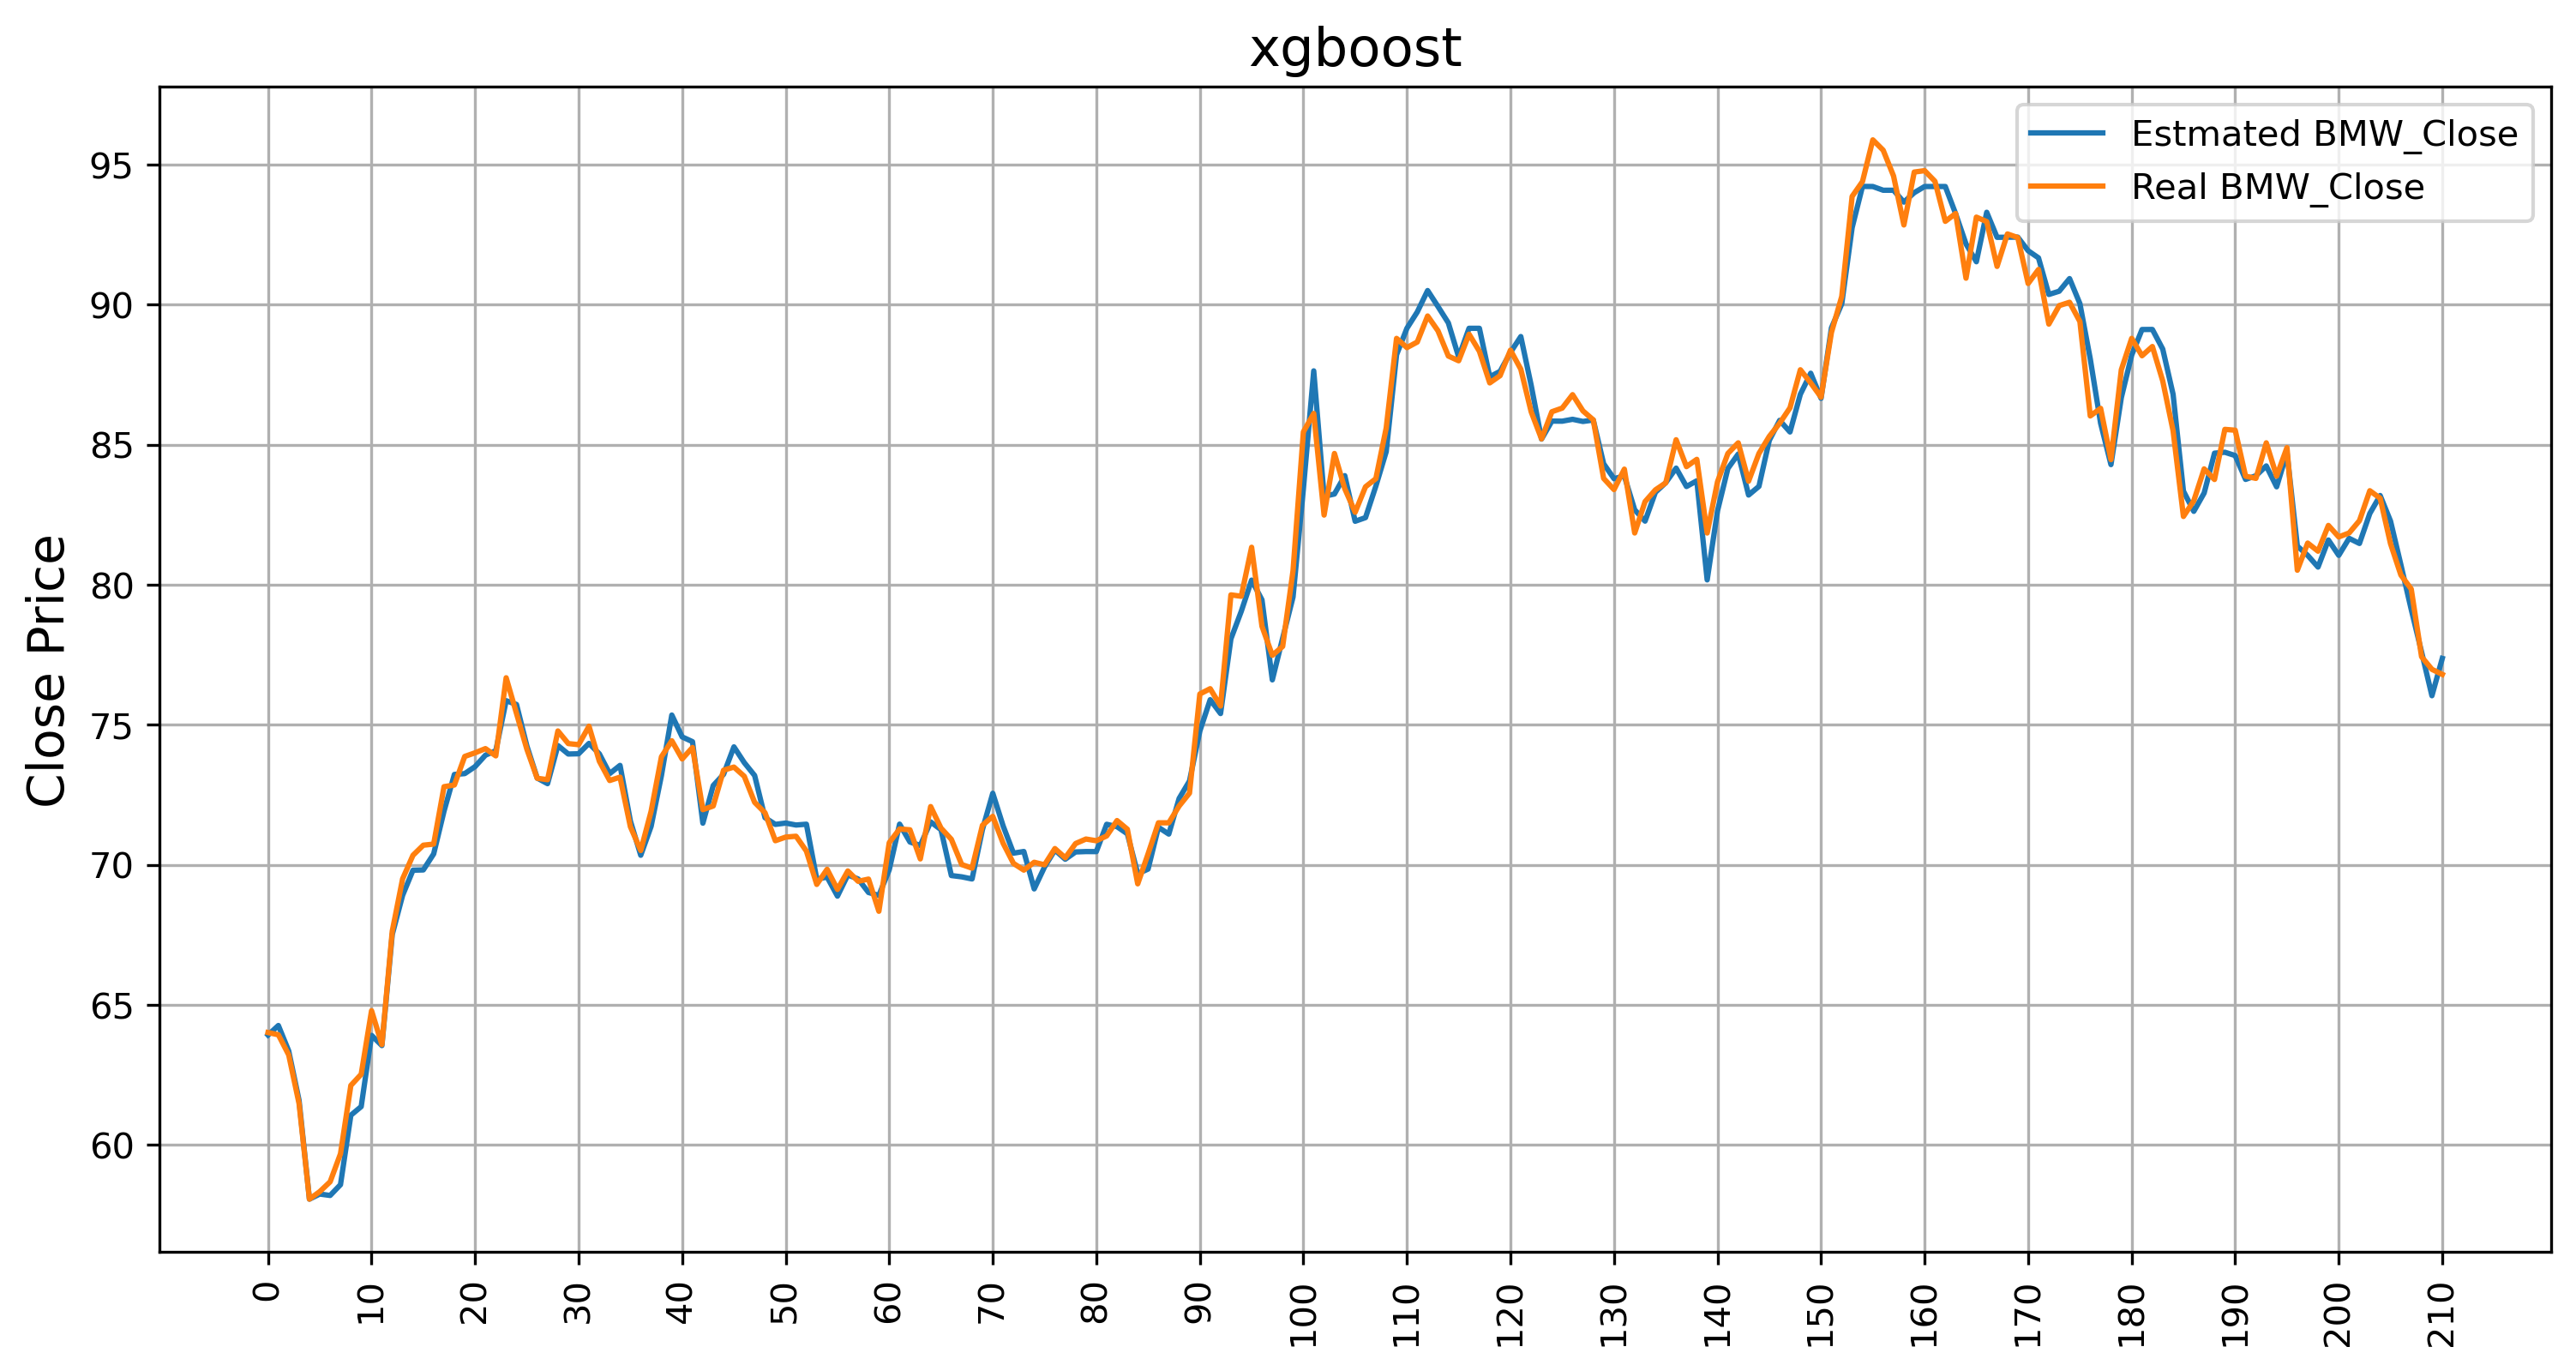

r2_socre: 0.9934707692560418


In [37]:
y_pred_xgb = result_plot(xgb_model, 'xgboost', x_train, y_train, x_test, y_test)

### RF

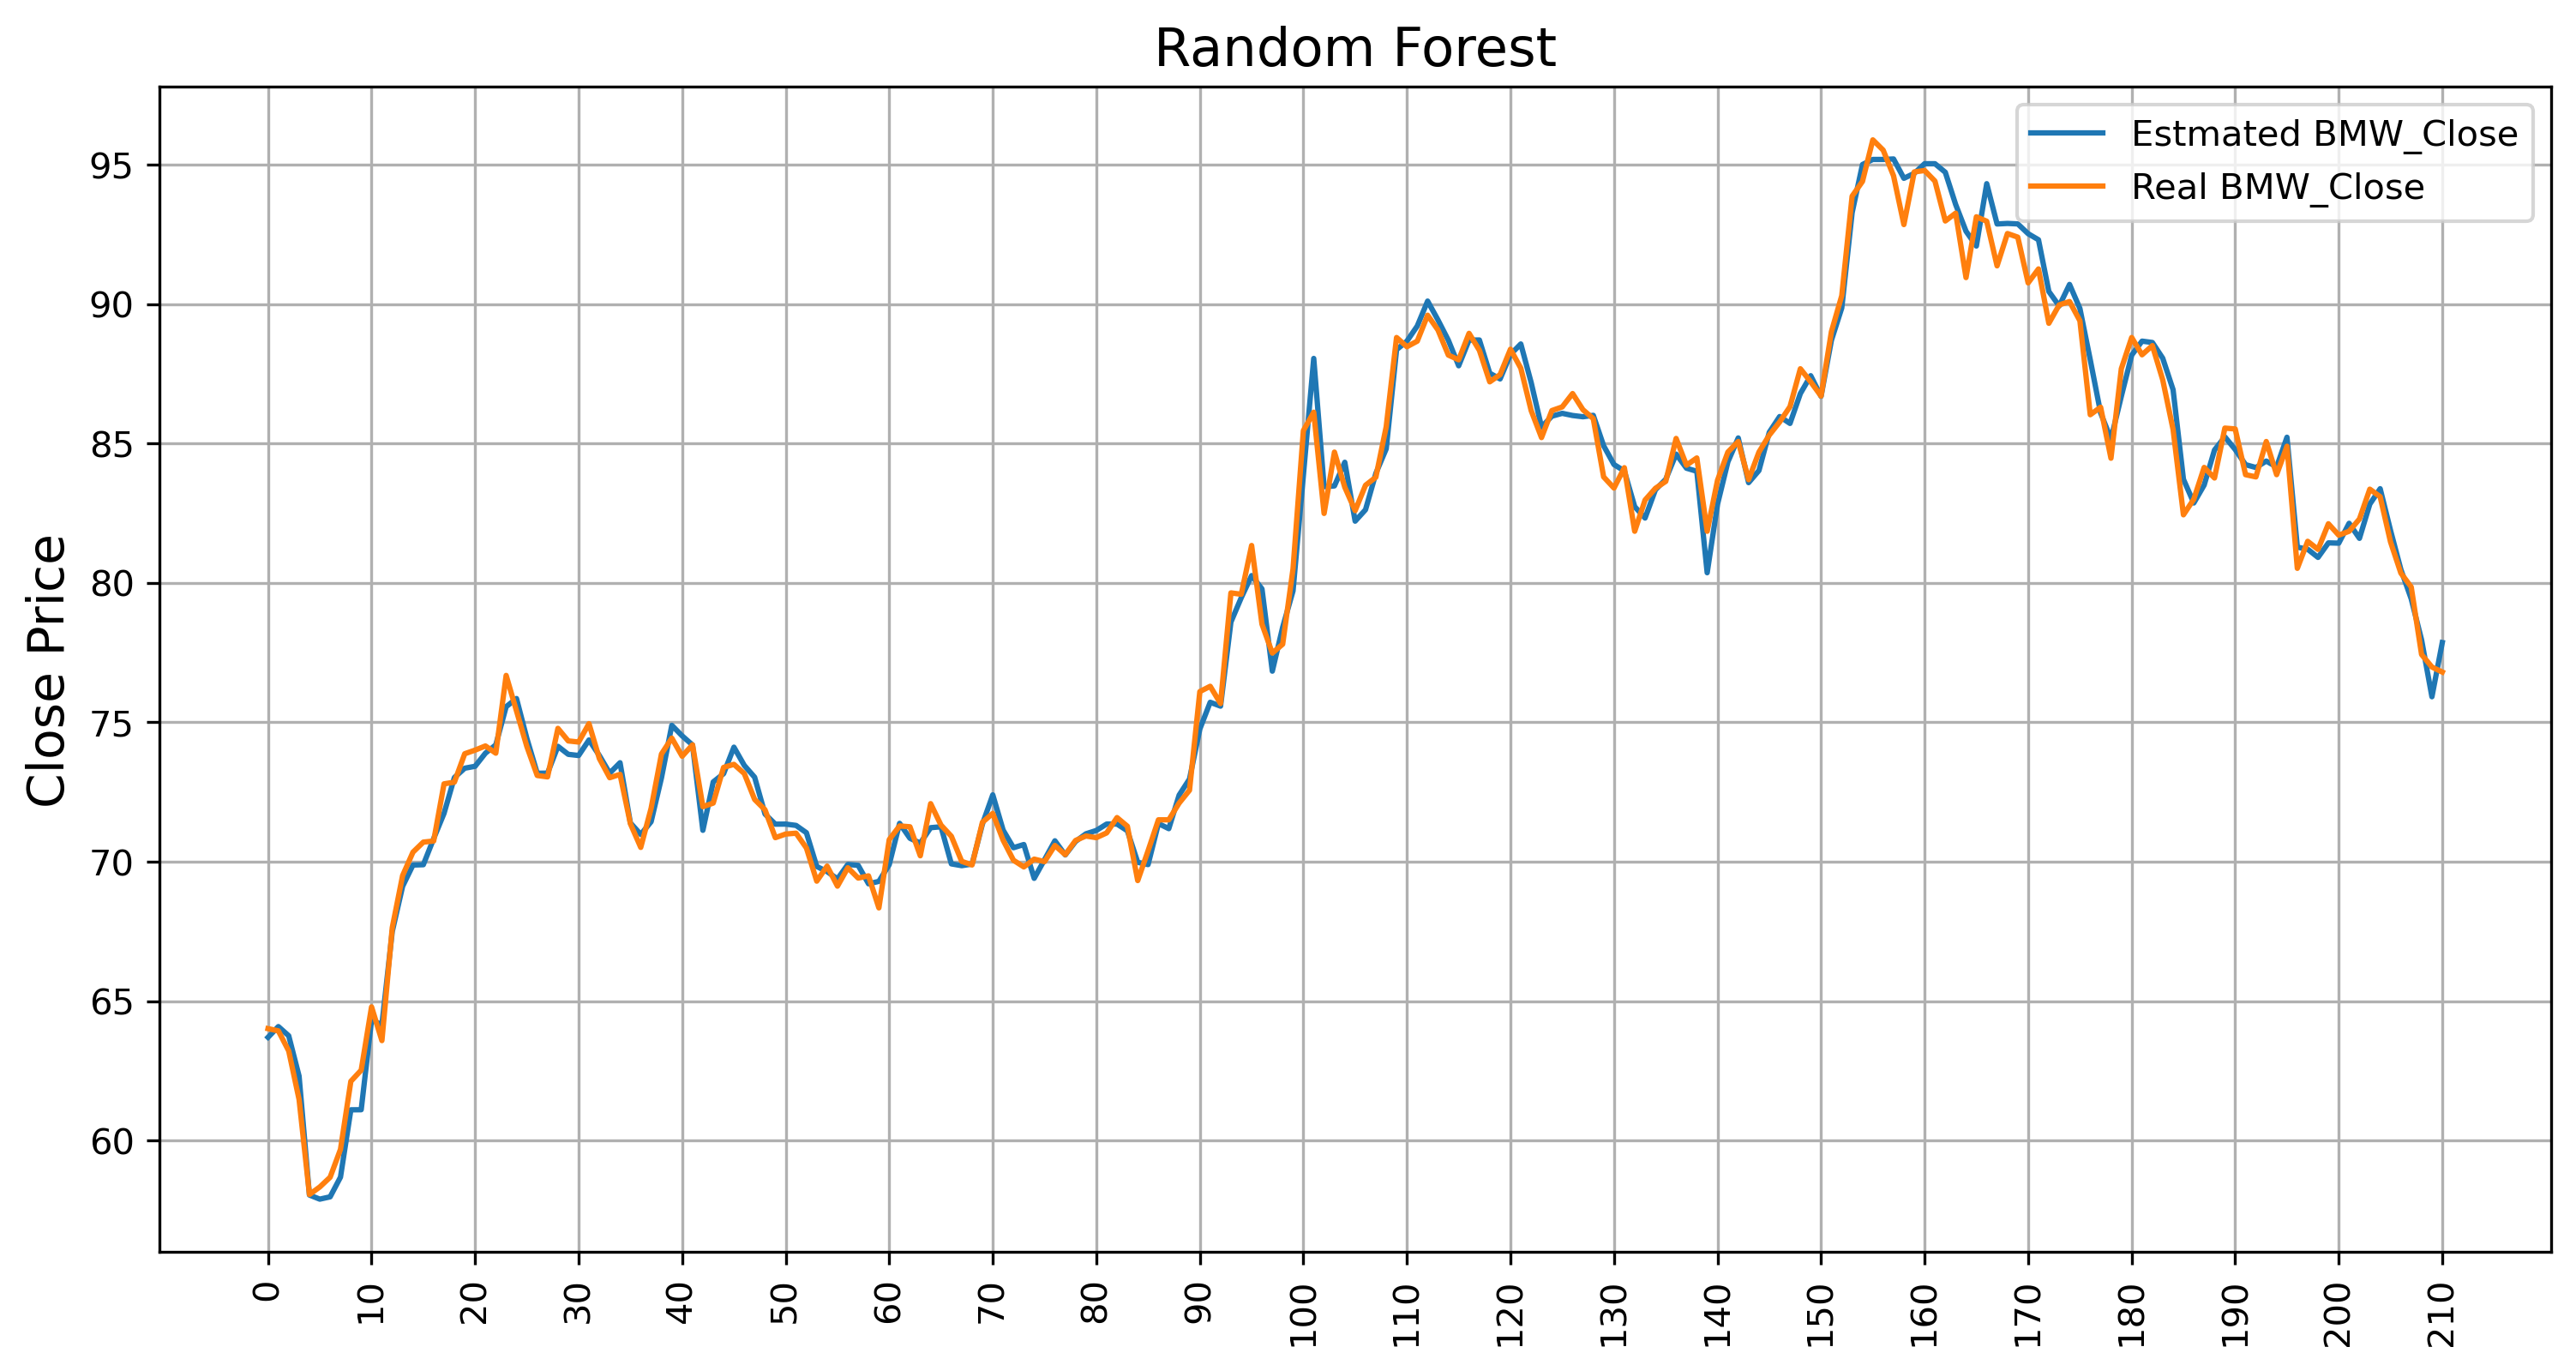

r2_socre: 0.9939612489228014


In [38]:
y_pred_rf = result_plot(rf_model, 'Random Forest', x_train, y_train, x_test, y_test)

### LinearRegression

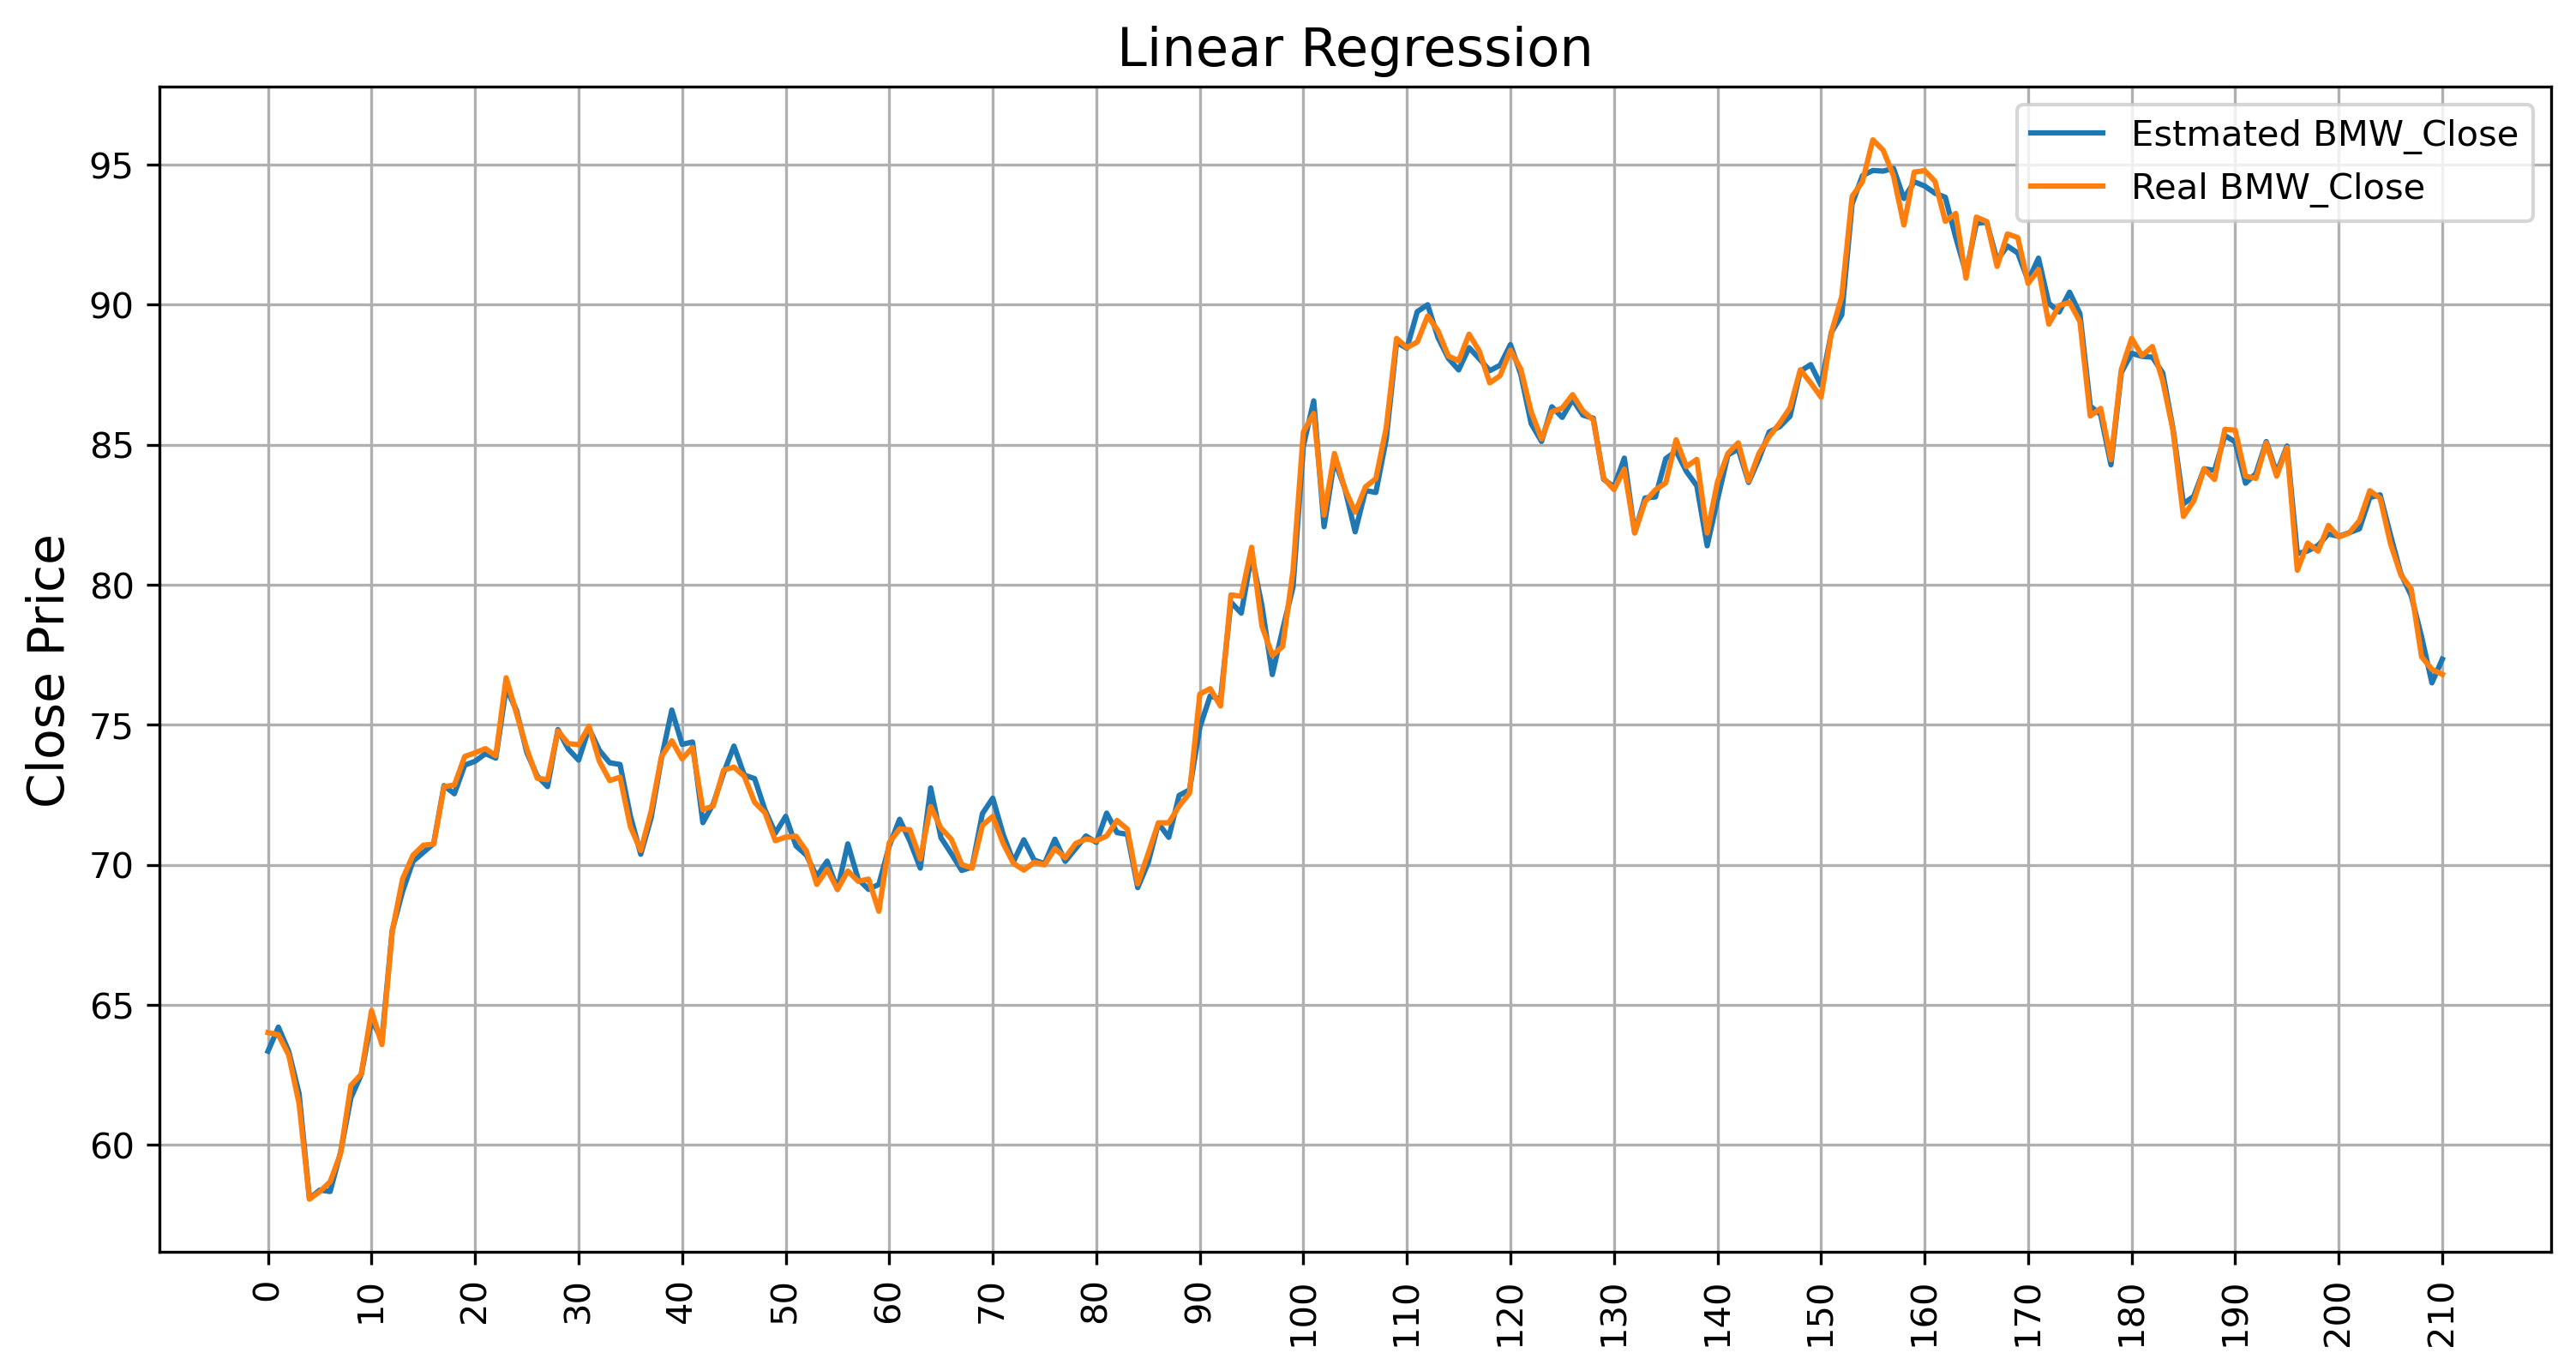

r2_socre: 0.9977871617616654


In [39]:
y_pred_LR = result_plot(LR, 'Linear Regression', x_train, y_train, x_test, y_test)

### Linear model: Ridge

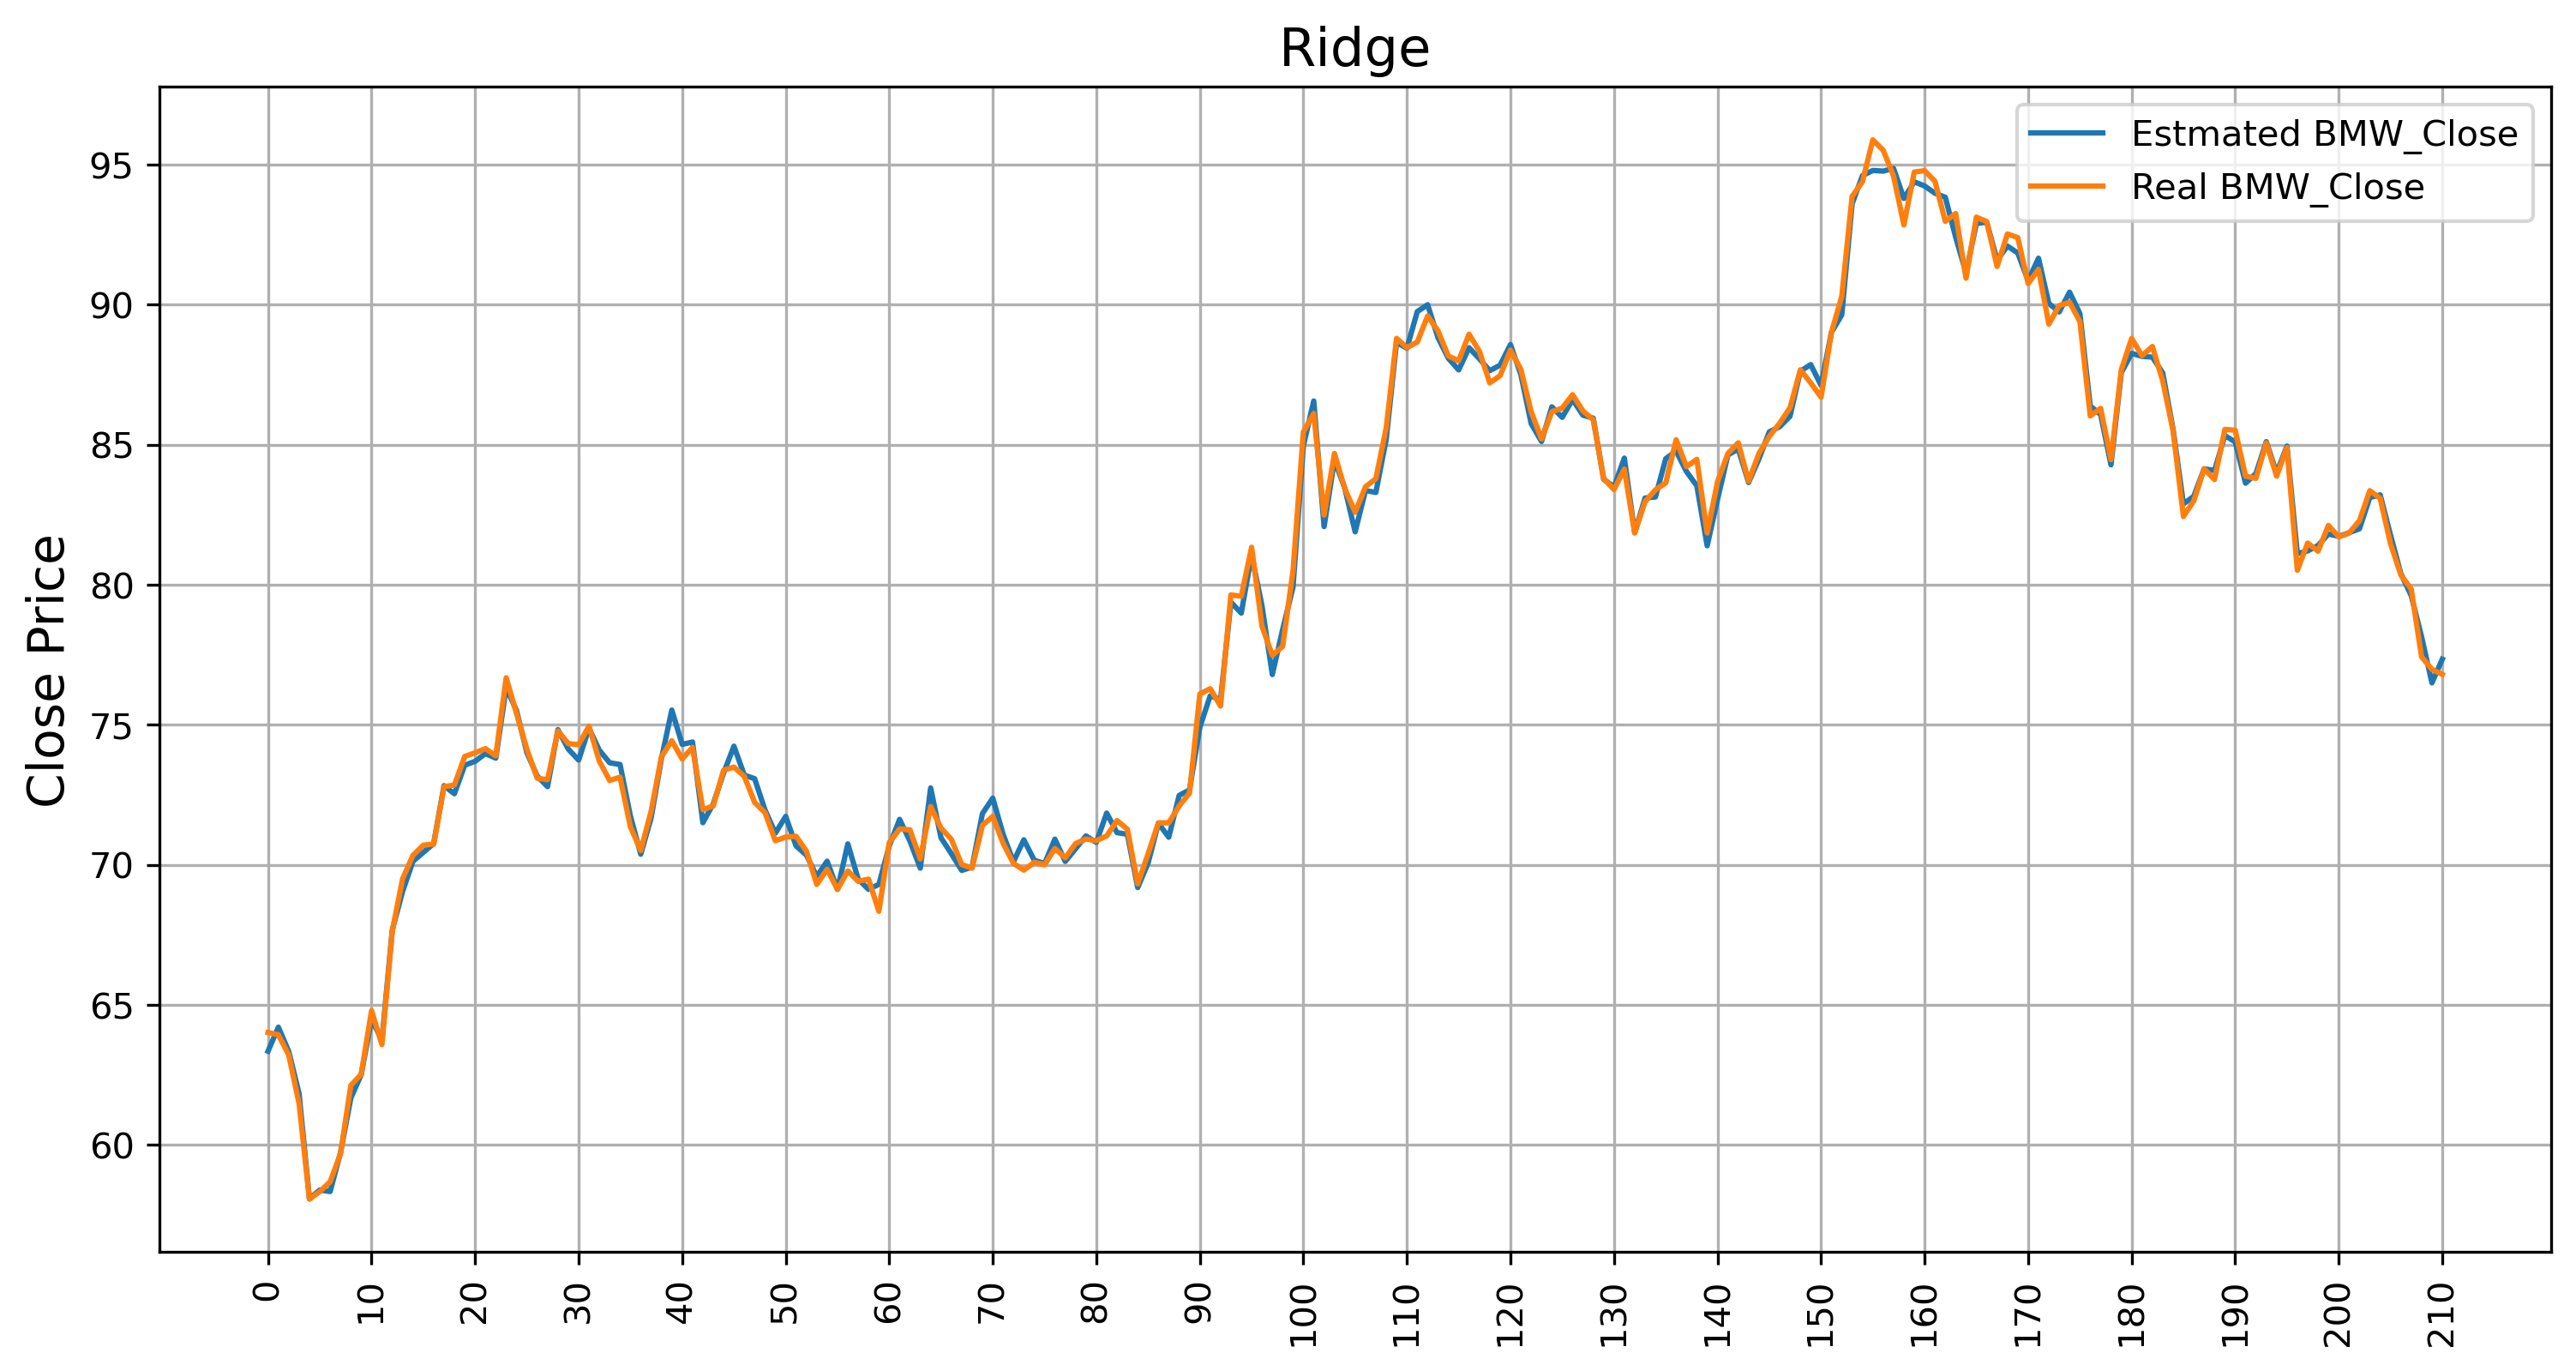

r2_socre: 0.9977869309984743


In [40]:
y_pred_Ridge = result_plot(Ridge_model, 'Ridge', x_train, y_train, x_test, y_test)

## Geometric Mean

In [41]:
from scipy.stats.mstats import gmean

In [42]:
y_pred_gmean = gmean([y_pred_xgb, y_pred_rf, y_pred_LR, y_pred_Ridge])

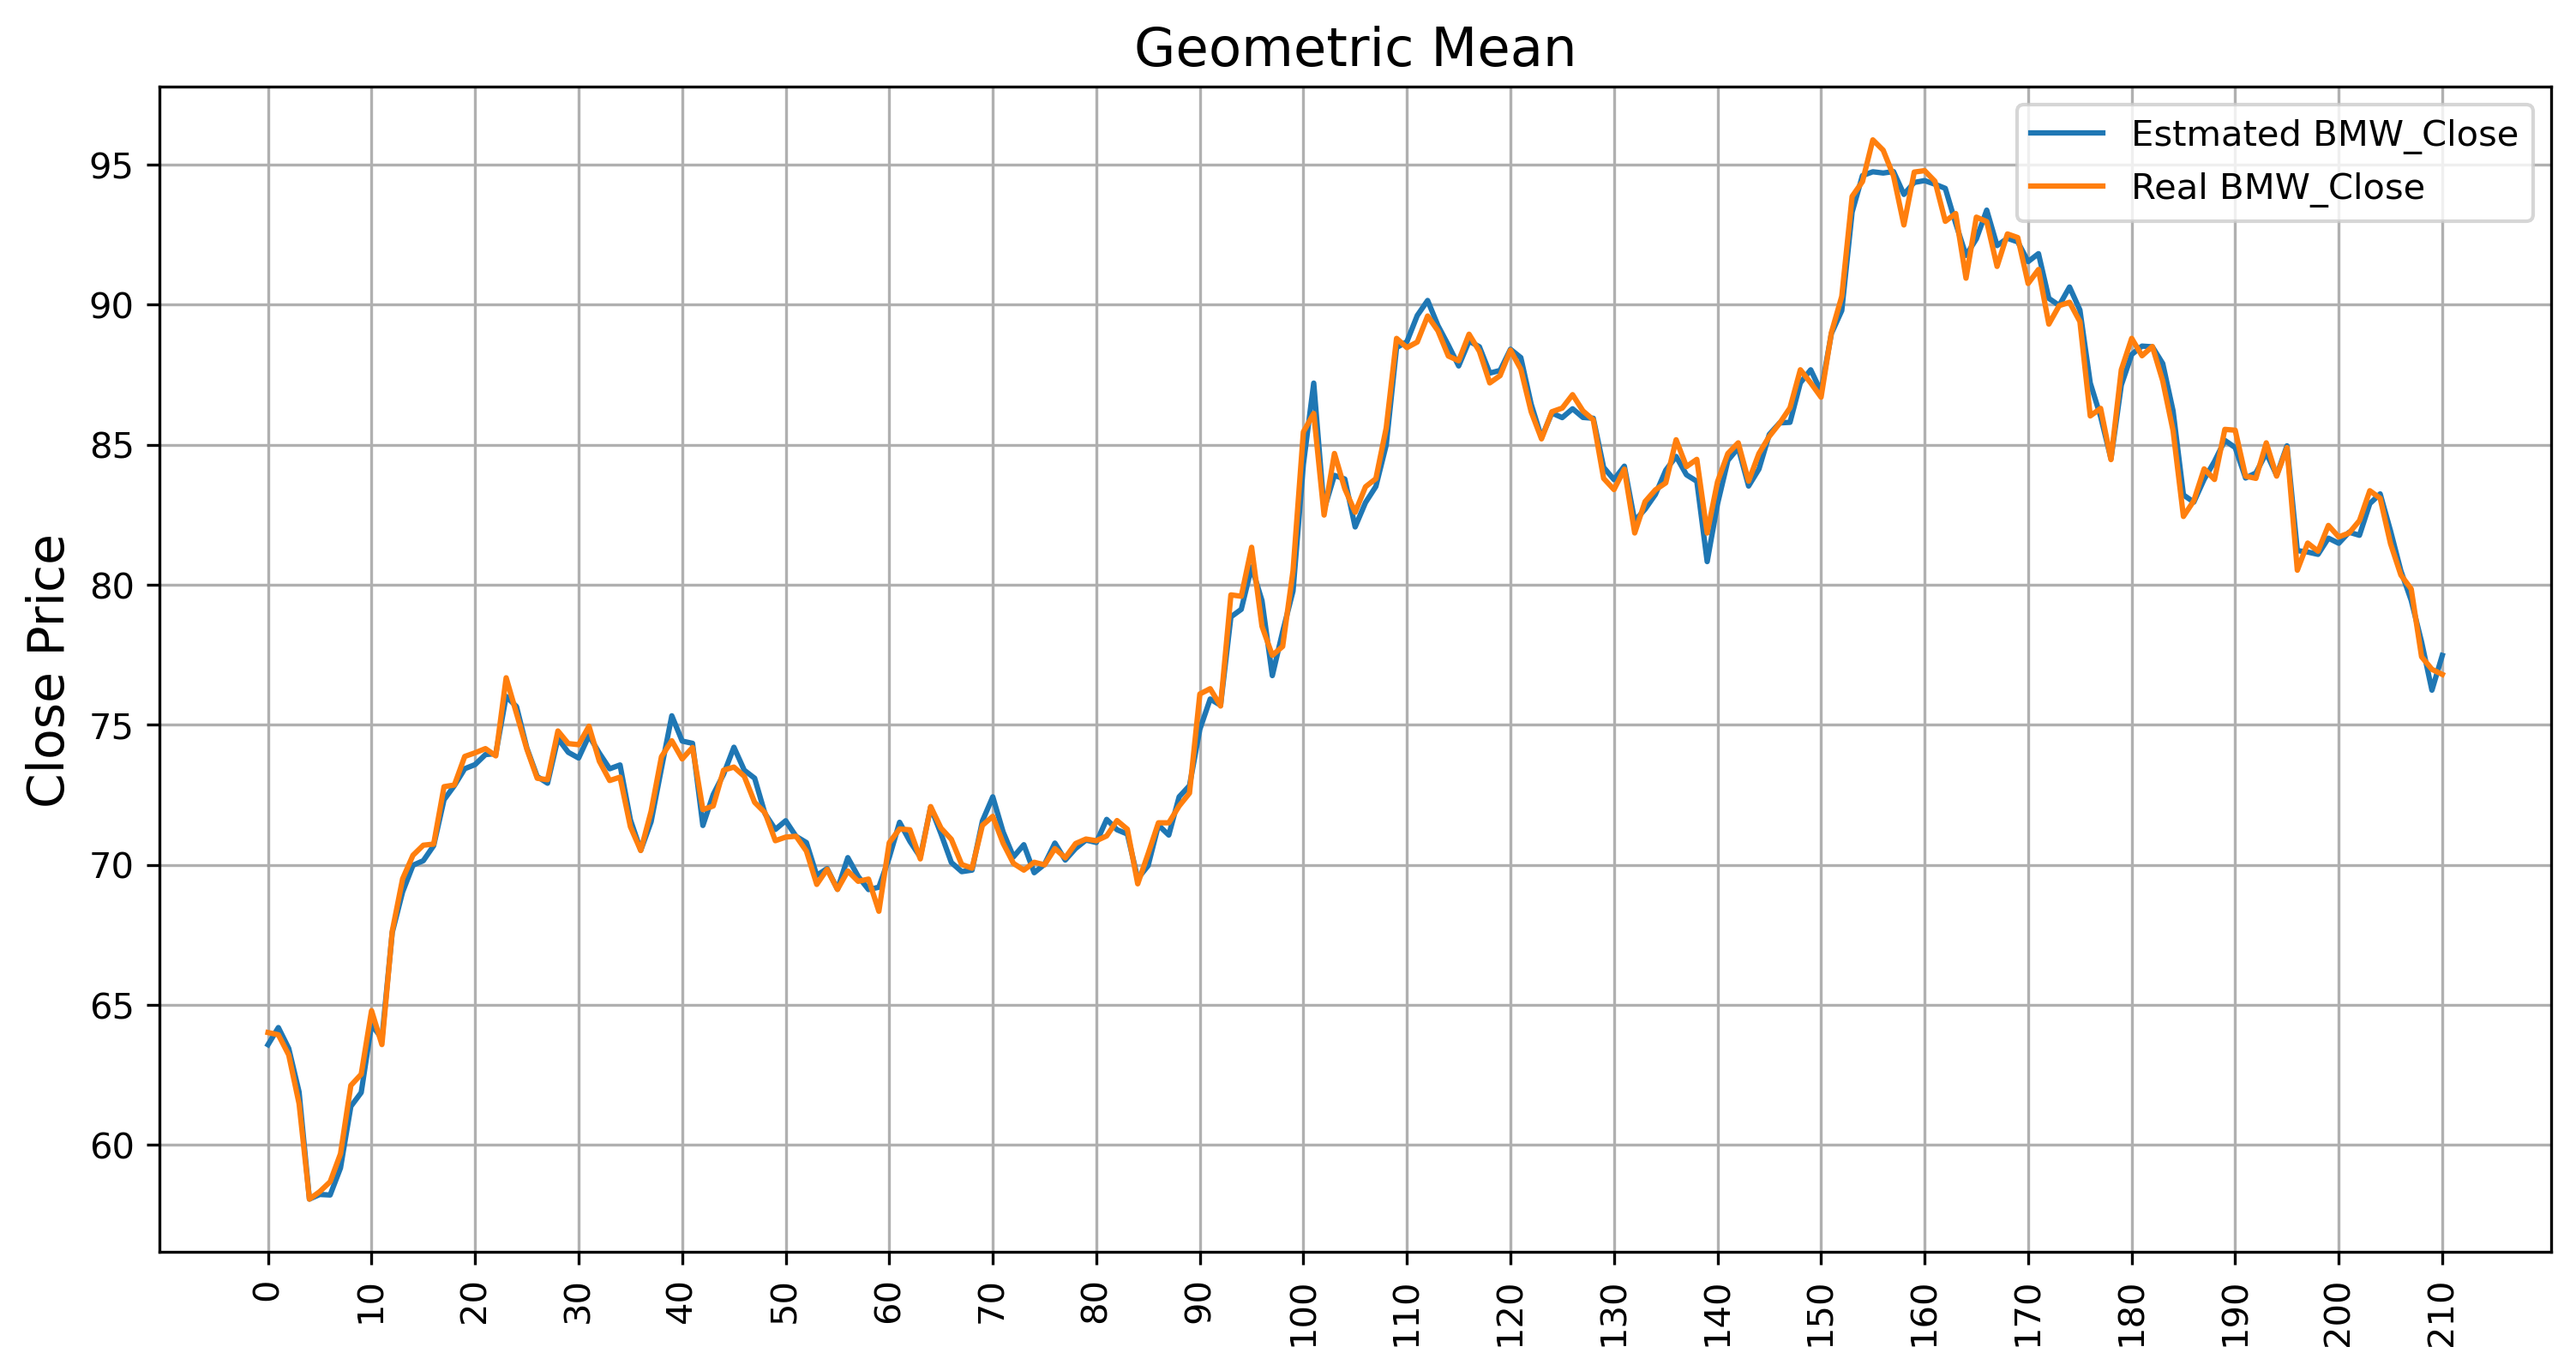

r2_socre: 0.9969652113426537


In [48]:
plt.figure(figsize=(12,6),dpi=300)
plt.plot(y_pred_gmean, label="Estmated BMW_Close")
plt.plot(y_test, label="Real BMW_Close")
plt.title('Geometric Mean', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()
print('r2_socre:', r2_score(y_test, y_pred_gmean, multioutput='uniform_average'))

## All

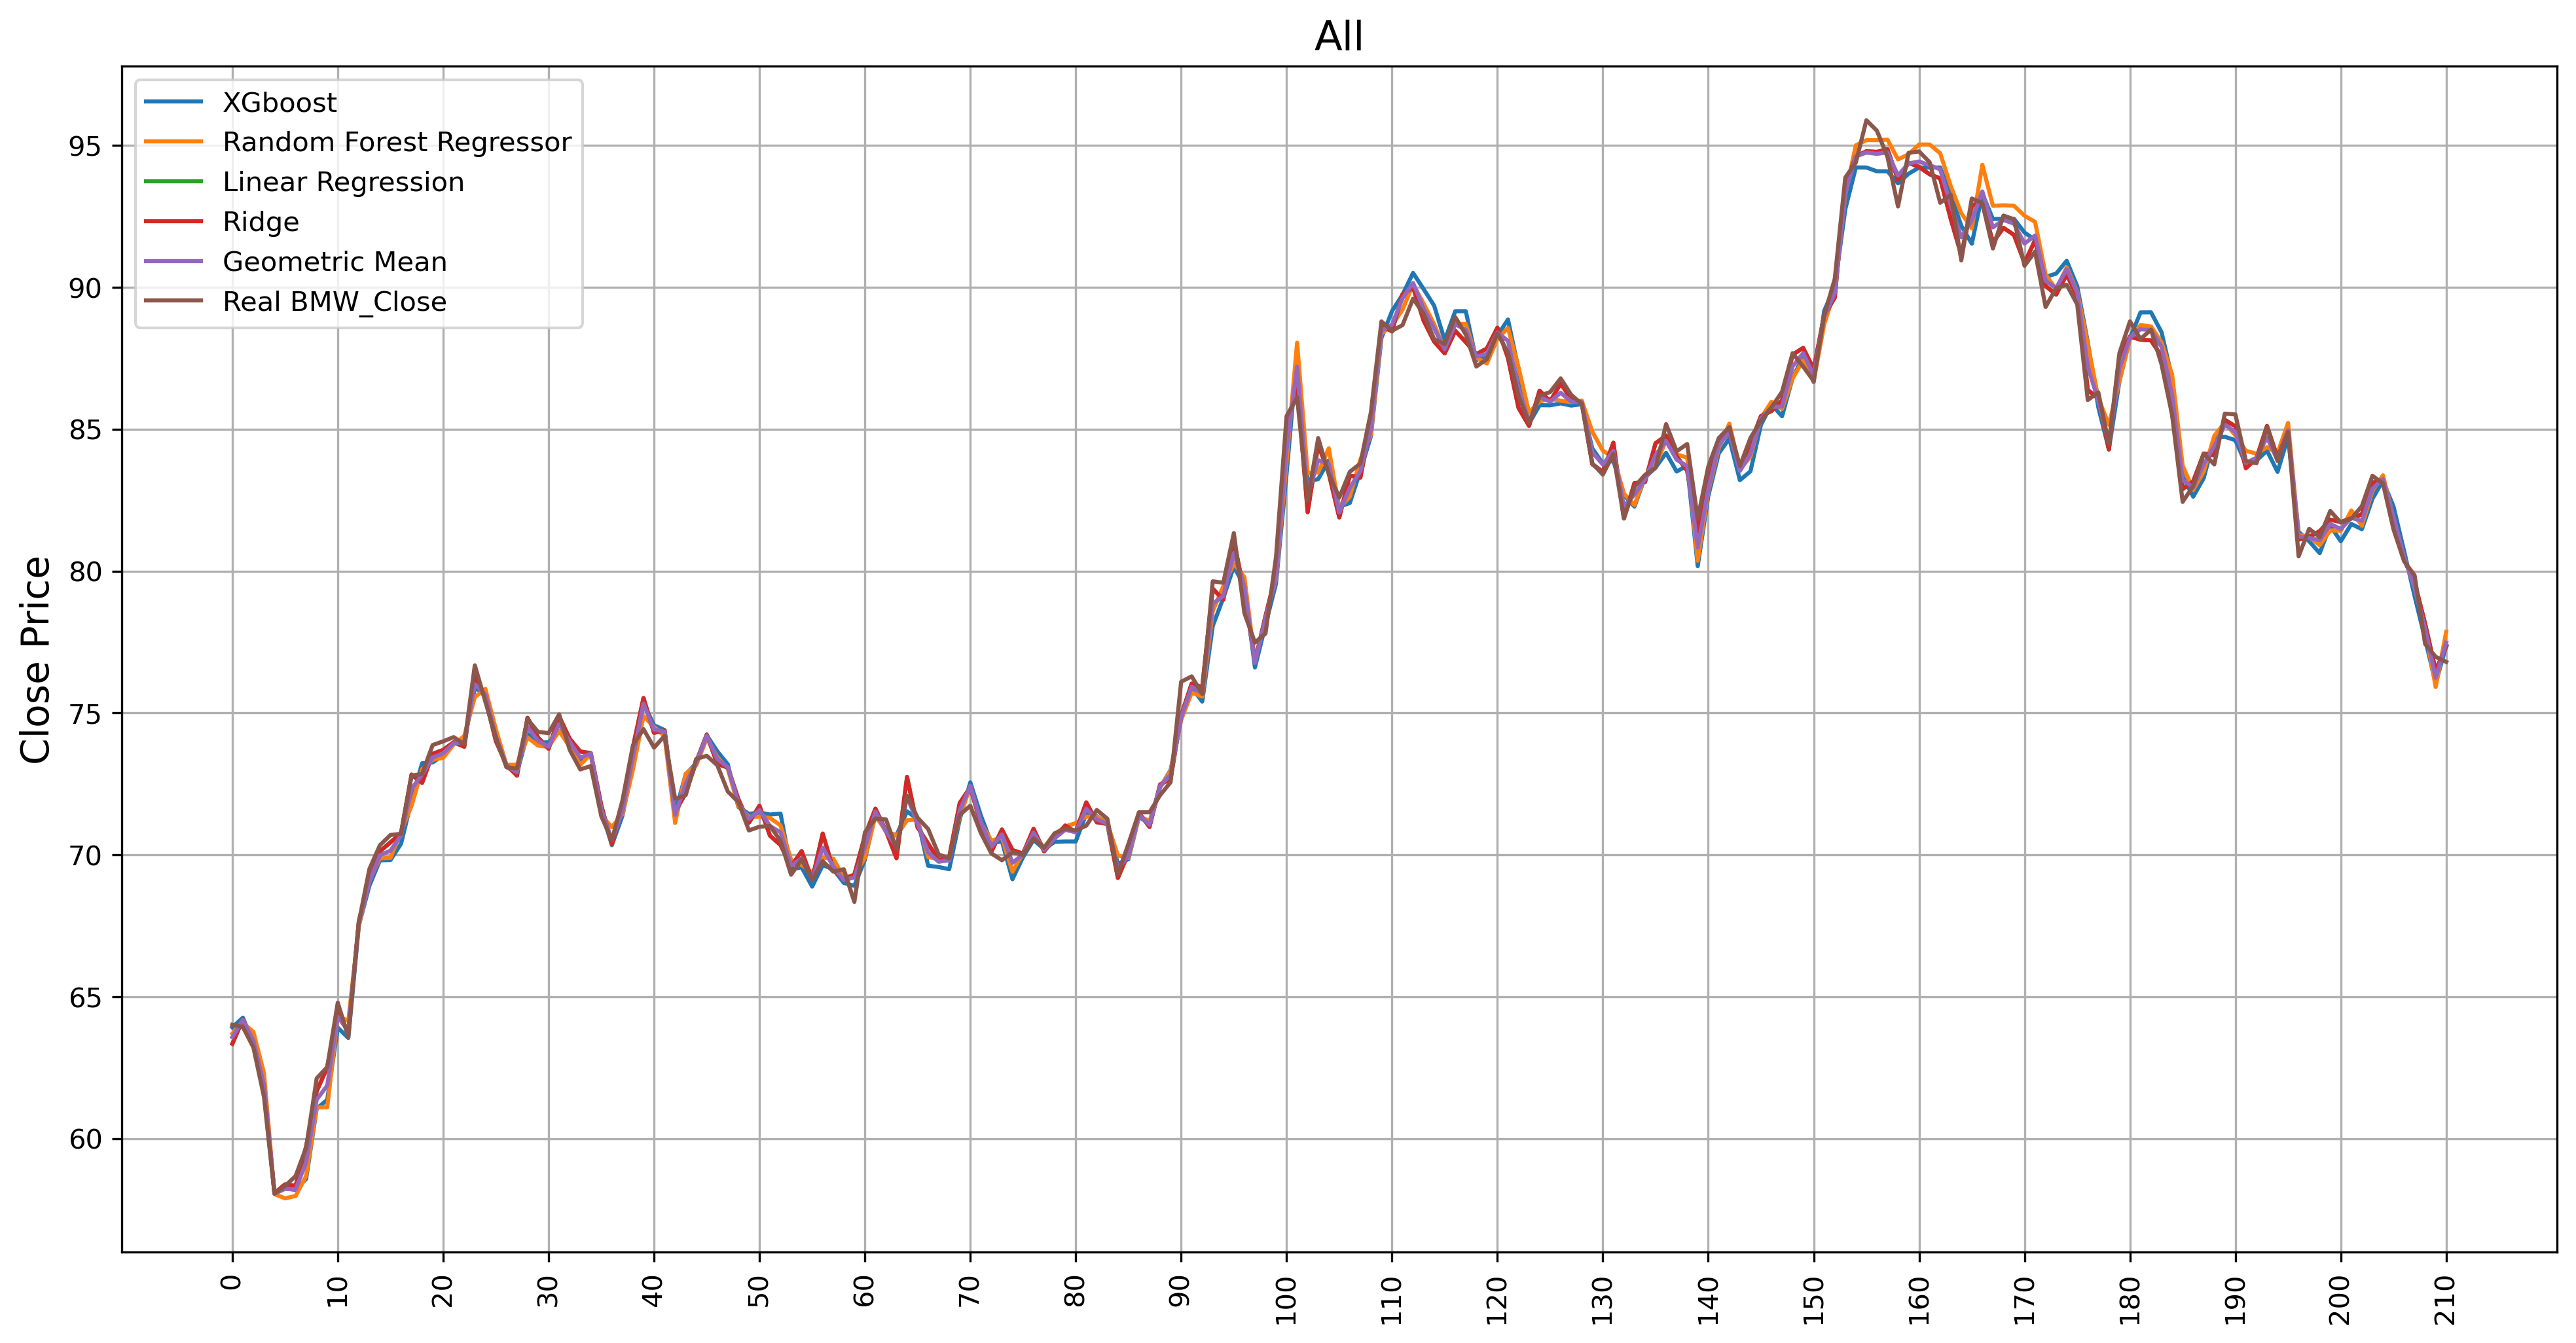

r2_socre: 0.9969652113426537


In [49]:
plt.figure(figsize=(16,8),dpi=300)
plt.plot(y_pred_xgb, label="XGboost")
plt.plot(y_pred_rf, label="Random Forest Regressor")
plt.plot(y_pred_LR, label="Linear Regression")
plt.plot(y_pred_Ridge, label="Ridge")
plt.plot(y_pred_gmean, label="Geometric Mean")
plt.plot(y_test, label="Real BMW_Close")
plt.title('All', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test.shape[0], int(y_test.shape[0] / 20)),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()
print('r2_socre:', r2_score(y_test, y_pred_gmean, multioutput='uniform_average'))

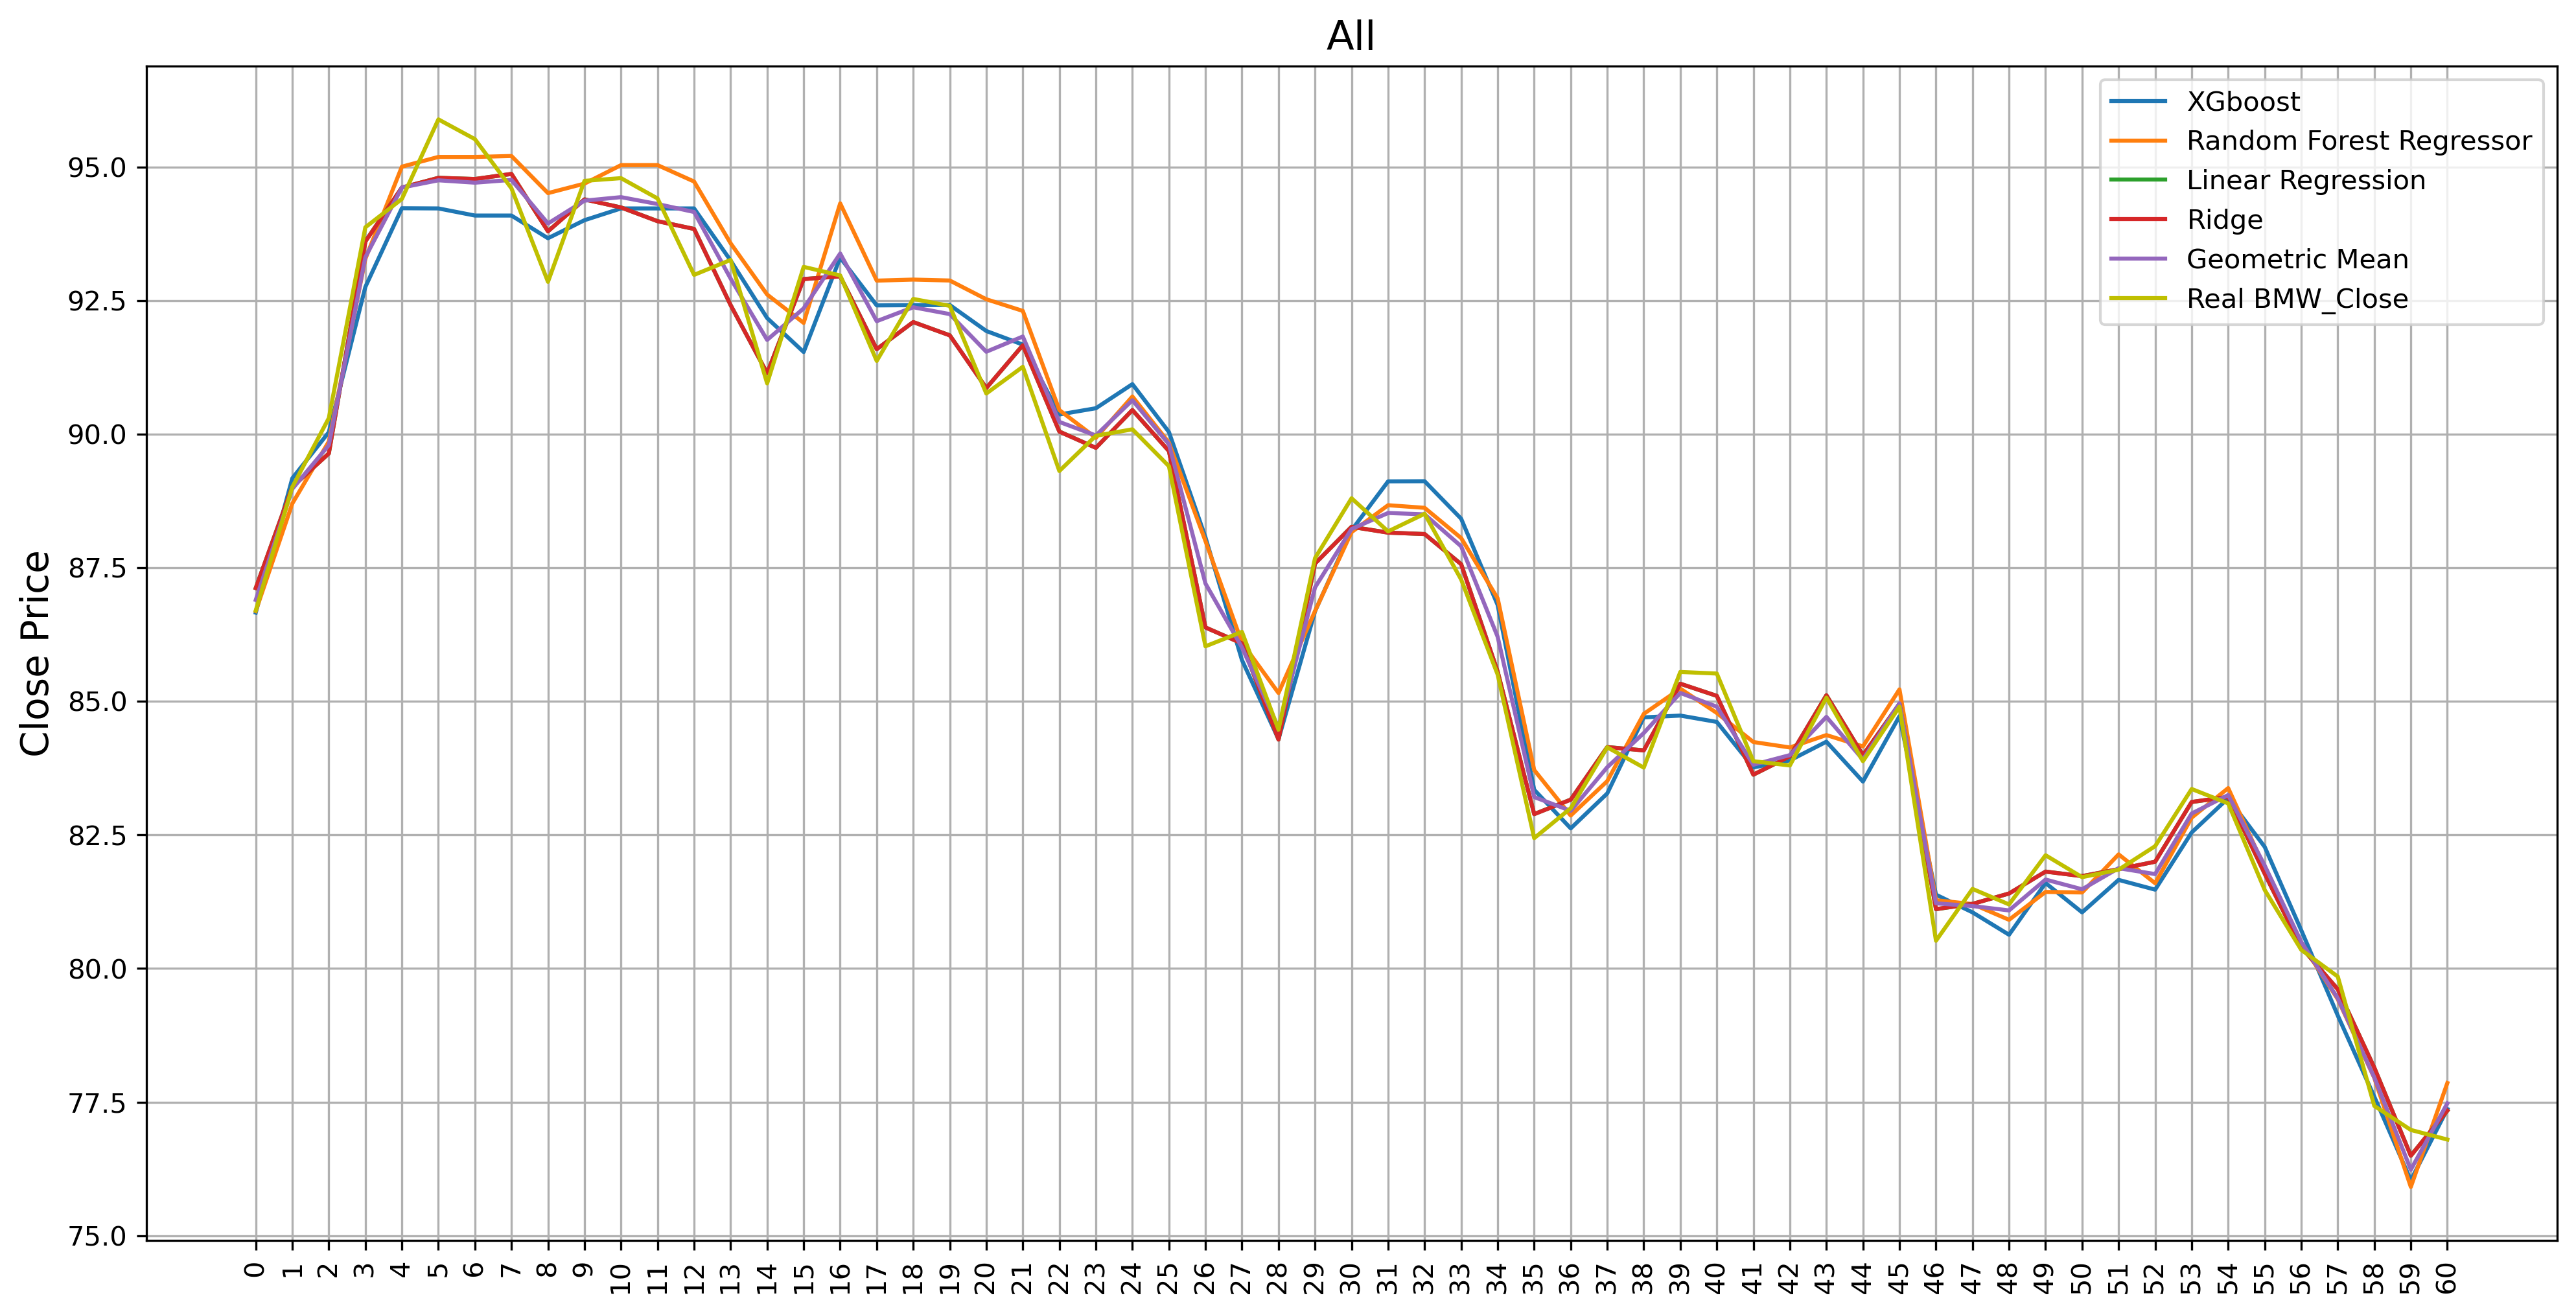

r2_socre: 0.9888735282438591


In [54]:
plt.figure(figsize=(16,8),dpi=300)
plt.plot(y_pred_xgb[150:], label="XGboost")
plt.plot(y_pred_rf[150:], label="Random Forest Regressor")
plt.plot(y_pred_LR[150:], label="Linear Regression")
plt.plot(y_pred_Ridge[150:], label="Ridge")
plt.plot(y_pred_gmean[150:], label="Geometric Mean")
plt.plot(y_test[150:], label="Real BMW_Close",color='y')
plt.title('All', fontsize=15)
plt.legend()
plt.grid()
plt.xticks(np.arange(0, y_test[150:].shape[0]),
           rotation=90)
plt.ylabel('Close Price', fontsize=14)
plt.show()
print('r2_socre:', r2_score(y_test[150:], y_pred_gmean[150:], multioutput='uniform_average'))

# 用这个流程预测一下15天的数据(08.24-09.07)

## Get data

### SP500

In [97]:
import pandas_datareader.data as pdr

In [79]:
sp500_15 = pdr.DataReader(tickers='^GSPC',
                          data_source='yahoo',
                          start='2021-08-25',
                          end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [80]:
sp500_15.to_csv('./data/sp500_15.csv')

In [42]:
sp500_15 = loadData('sp500_15').iloc[:, :-2]
sp500_15

,Open,High,Low,Close
Date,,,,
2021-08-24,4484.399902,4492.810059,4482.279785,4486.229980
2021-08-25,4490.450195,4501.709961,4485.660156,4496.189941
2021-08-26,4493.750000,4495.899902,4468.990234,4470.000000
2021-08-27,4474.100098,4513.330078,4474.100098,4509.370117
2021-08-30,4513.759766,4537.359863,4513.759766,4528.790039
2021-08-31,4529.750000,4531.390137,4515.799805,4522.680176
2021-09-01,4528.799805,4537.109863,4522.020020,4524.089844
2021-09-02,4534.479980,4545.850098,4524.660156,4536.950195
2021-09-03,4532.419922,4541.450195,4521.299805,4535.430176


### CSI300

In [45]:
import tushare as ts

In [46]:
CSI300_15 = ts.get_k_data('hs300', start='2021-08-24',
                          end='2021-09-07').reset_index(drop=True)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [47]:
CSI300_15 = CSI300_15.iloc[:, :-1]
for name in CSI300_15.columns:
    CSI300_15 = CSI300_15.rename(columns={name: name.title()})

In [48]:
csi300_15 = CSI300_15.copy().set_index('Date')
csi300_15

,Open,Close,High,Low,Volume
Date,,,,,
2021-08-24,4844.59,4888.39,4906.20,4842.75,197883163.0
2021-08-25,4890.52,4898.16,4899.77,4865.76,189448016.0
2021-08-26,4892.20,4801.61,4892.20,4798.70,197617387.0
2021-08-27,4794.97,4827.04,4863.47,4793.59,183310211.0
2021-08-30,4847.03,4813.27,4849.16,4787.20,219635757.0
2021-08-31,4803.09,4805.61,4821.76,4740.75,235118658.0
2021-09-01,4804.69,4869.46,4906.40,4763.30,326721080.0
2021-09-02,4865.82,4869.41,4892.70,4845.62,267858013.0
2021-09-03,4875.07,4843.06,4886.55,4828.70,268091896.0


In [49]:
csi300_15.to_csv('./data/CSI300_15.csv')

In [50]:
CSI300_15 = loadData('CSI300_15').iloc[:, :-1]
CSI300_15

,Open,Close,High,Low
Date,,,,
2021-08-24,4844.59,4888.39,4906.20,4842.75
2021-08-25,4890.52,4898.16,4899.77,4865.76
2021-08-26,4892.20,4801.61,4892.20,4798.70
2021-08-27,4794.97,4827.04,4863.47,4793.59
2021-08-30,4847.03,4813.27,4849.16,4787.20
2021-08-31,4803.09,4805.61,4821.76,4740.75
2021-09-01,4804.69,4869.46,4906.40,4763.30
2021-09-02,4865.82,4869.41,4892.70,4845.62
2021-09-03,4875.07,4843.06,4886.55,4828.70


### car companies

#### BMW

In [74]:
bmw_15 = pdr.DataReader(tickers='BMW.DE',
                        data_source='yahoo',
                        start='2021-08-25',
                        end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [76]:
bmw_15.to_csv('./data/bmw_15.csv')

In [51]:
bmw_15 = loadData('bmw_15').iloc[:, :-2]
bmw_15

,Open,High,Low,Close
Date,,,,
2021-08-24,77.199997,78.970001,76.930000,78.419998
2021-08-25,78.349998,78.989998,77.419998,78.000000
2021-08-26,77.250000,78.220001,76.690002,77.940002
2021-08-27,78.279999,78.489998,77.339996,78.279999
2021-08-30,78.599998,79.239998,77.779999,79.050003
2021-08-31,79.480003,81.180000,79.440002,80.370003
2021-09-01,81.339996,81.559998,79.150002,79.470001
2021-09-02,79.690002,80.000000,79.300003,79.419998
2021-09-03,79.900002,80.300003,79.019997,79.400002


#### Volkswagen

In [88]:
Volkswagen_15 = pdr.DataReader(tickers='VOW3.DE',
                        data_source='yahoo',
                        start='2021-08-25',
                        end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [89]:
Volkswagen_15.to_csv('./data/Volkswagen_15.csv')

In [52]:
Volkswagen_15 = loadData('Volkswagen_15').iloc[:, :-2]
Volkswagen_15

,Open,High,Low,Close
Date,,,,
2021-08-24,196.179993,199.740005,195.399994,198.759995
2021-08-25,199.380005,202.250000,198.000000,199.699997
2021-08-26,198.600006,201.449997,197.520004,200.000000
2021-08-27,200.050003,200.800003,198.699997,200.750000
2021-08-30,201.350006,202.250000,200.800003,201.000000
2021-08-31,202.350006,203.850006,199.179993,201.300003
2021-09-01,203.800003,204.350006,199.979996,201.050003
2021-09-02,202.500000,203.300003,199.979996,202.699997
2021-09-03,202.800003,204.000000,201.250000,201.899994


#### tesla

In [106]:
tesla_15 = pdr.DataReader(tickers='TSLA',
                          data_source='yahoo',
                          start='2021-08-25',
                          end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [112]:
tesla_15.to_csv('./data/tesla_15.csv')

In [53]:
tesla_15 = loadData('tesla_15').iloc[:, :-2]
tesla_15

,Open,High,Low,Close
Date,,,,
2021-08-24,710.679993,715.219971,702.640015,708.489990
2021-08-25,707.030029,716.969971,704.000000,711.200012
2021-08-26,708.309998,715.400024,697.619995,701.159973
2021-08-27,705.000000,715.000000,702.099976,711.919983
2021-08-30,714.719971,731.000000,712.729980,730.909973
2021-08-31,733.000000,740.390015,726.440002,735.719971
2021-09-01,734.080017,741.989990,731.270020,734.090027
2021-09-02,734.500000,740.969971,730.539978,732.390015
2021-09-03,732.250000,734.000000,724.200012,733.570007


#### nissian

In [122]:
nissan_15 = pdr.DataReader(tickers='7201.T',
                           data_source='yahoo',
                           start='2021-08-24',
                           end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [123]:
nissan_15.to_csv('./data/nissan_15.csv')

In [54]:
nissan_15 = loadData('nissan_15').iloc[:, :-2]
nissan_15

,Open,High,Low,Close
Date,,,,
2021-08-24,546.299988,562.799988,546.299988,559.799988
2021-08-25,562.799988,576.299988,560.500000,568.299988
2021-08-26,570.799988,571.700012,560.299988,566.000000
2021-08-27,557.599976,569.099976,555.599976,569.099976
2021-08-30,586.099976,587.599976,575.500000,579.400024
2021-08-31,566.000000,581.400024,563.700012,578.500000
2021-09-01,583.799988,585.200012,573.599976,575.400024
2021-09-02,570.500000,572.700012,556.099976,559.099976
2021-09-03,561.400024,570.700012,561.400024,569.599976


#### honda

In [134]:
honda_15 = pdr.DataReader(tickers='HMC',
                          data_source='yahoo',
                          start='2021-08-25',
                          end='2021-09-08')

[*********************100%***********************]  1 of 1 completed


In [135]:
honda_15.to_csv('./data/honda_15.csv')

In [55]:
honda_15 = loadData('honda_15').iloc[:, :-2]
honda_15

,Open,High,Low,Close
Date,,,,
2021-08-24,30.100000,30.340000,30.049999,30.200001
2021-08-25,30.070000,30.190001,29.879999,30.100000
2021-08-26,29.910000,29.910000,29.350000,29.389999
2021-08-27,29.530001,29.870001,29.530001,29.850000
2021-08-30,30.020000,30.049999,29.809999,29.879999
2021-08-31,30.110001,30.400000,30.070000,30.260000
2021-09-01,30.440001,30.580000,30.360001,30.450001
2021-09-02,30.540001,30.590000,30.330000,30.459999
2021-09-03,30.709999,30.840000,30.549999,30.820000


## EDA

In [56]:
Volkswagen_15 = name_change(Volkswagen_15, "Volkswagen_15")
bmw_15 = name_change(bmw_15, "bmw_15")
tesla_15 = name_change(tesla_15, "tesla_15")
nissan_15 = name_change(nissan_15, "nissan_15")
honda_15 = name_change(honda_15, "honda_15")
sp500_15 = name_change(sp500_15, "SP500_15")
CSI300_15 = name_change(CSI300_15, "CSI300_15")

In [57]:
DATA_15 = mergeData([bmw_15, Volkswagen_15, tesla_15, nissan_15, honda_15, sp500_15, CSI300_15])

In [58]:
for col in DATA_15.columns:
    linear_inter(DATA_15, col)

In [59]:
DATA_15 = DATA_15.iloc[:, :-1]

In [60]:
feature = DATA_15.loc[:, DATA_15.columns != 'bmw_15_Close'].values

In [61]:
label = DATA_15.bmw_15_Close.values
label

array([78.41999817, 78.        , 77.94000244, 78.27999878, 79.05000305,
       80.37000275, 79.47000122, 79.41999817, 79.40000153, 79.84999847,
       80.47000122])

## Predict

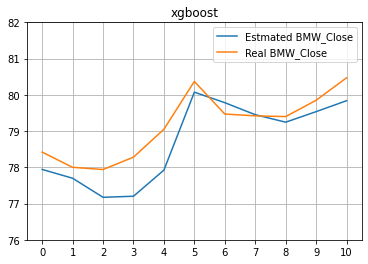

r2_socre: 0.4965948024102934


In [62]:
# xgboost
xgb_model.fit(x,y)
y_15_xgb = xgb_model.predict(feature)

plt.plot(y_15_xgb, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('xgboost')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()

print('r2_socre:', r2_score(label, y_15_xgb, multioutput='uniform_average'))

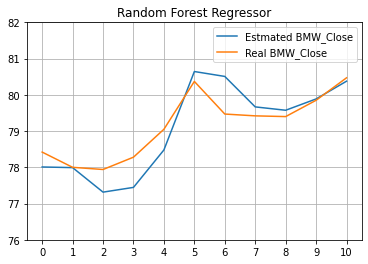

r2_socre: 0.6477919664606031


In [63]:
# RF
rf_model.fit(x,y)
y_15_rf = rf_model.predict(feature)

plt.plot(y_15_rf, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Random Forest Regressor')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()

print('r2_socre:', r2_score(label, y_15_rf, multioutput='uniform_average'))

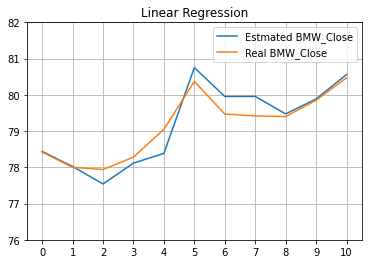

r2_socre: 0.8369236902353357


In [64]:
# Linear Regression
LR.fit(x,y)
y_15_LR = LR.predict(feature)

plt.plot(y_15_LR, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()

print('r2_socre:', r2_score(label, y_15_LR, multioutput='uniform_average'))

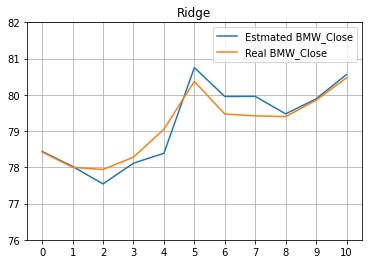

r2_socre: 0.8369632646878369


In [65]:
# Ridge
Ridge_model.fit(x,y)
y_15_Ridge = Ridge_model.predict(feature)

plt.plot(y_15_Ridge, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Ridge')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()

print('r2_socre:', r2_score(label, y_15_Ridge, multioutput='uniform_average'))

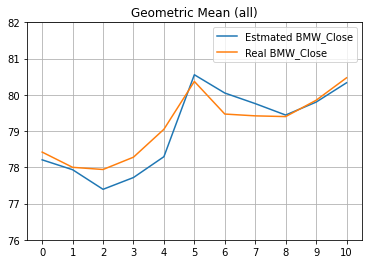

r2_socre: 0.7830737095567094


In [66]:
y_15_gmean = gmean([y_15_xgb, y_15_rf, y_15_LR, y_15_Ridge])

plt.plot(y_15_gmean, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Geometric Mean (all)')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()
print('r2_socre:', r2_score(label, y_15_gmean, multioutput='uniform_average'))

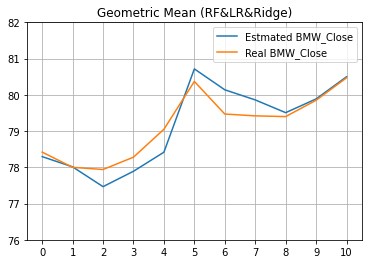

r2_socre: 0.8052945537450714


In [67]:
y_15_gmean = gmean([y_15_rf, y_15_LR, y_15_Ridge])

plt.plot(y_15_gmean, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Geometric Mean (RF&LR&Ridge)')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()
print('r2_socre:', r2_score(label, y_15_gmean, multioutput='uniform_average'))

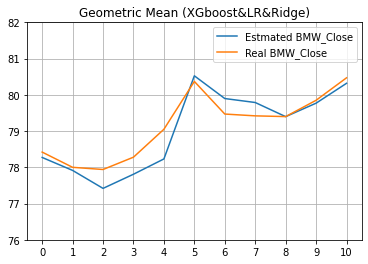

r2_socre: 0.8055167908841258


In [348]:
y_15_gmean = gmean([y_15_xgb, y_15_LR, y_15_Ridge])

plt.plot(y_15_gmean, label="Estmated BMW_Close")
plt.plot(label, label="Real BMW_Close")
plt.title('Geometric Mean (XGboost&LR&Ridge)')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, label.shape[0]))
plt.yticks(np.arange(76, 83))
plt.show()
print('r2_socre:', r2_score(label, y_15_gmean, multioutput='uniform_average'))